# Ejercicio 1. - SOLUCION ALTERNATIVA AL LIBRO
1- Correr lo visto en el curso de la sección "Lab" del libro de James-Witten-Hastie-Tibshirani para el capítulo de clasificación.
En particular interesa saber realizar las predicciones, armar la matriz de confusión y separar los datos en determinado porcentaje para entrenamiento y el resto para predicción.
2- (opcional) Utilizar alguna base de datos, elegir un porcentaje de entrenamiento y otro de predicción y realizar las comparaciones como se muestran en las figuras 4.10 y 4.11 del libro (página 152).
3- Dibujar las curvas ROC en cada caso y calcular la medida AUC para comparar los métodos de predicción.

**Se correra el lab correspondiente a la seccion 4.7: Lab: Logistic Regression, LDA, QDA, and KNN. Con codigo mio, sigue el libro pero no es exactamente igual. es mas ''vida real''**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
#instalo libreria para los datos
!pip install ISLP


In [ ]:
from ISLP import load_data

# Cargar el conjunto de datos Smarket
smarket_data = load_data('Smarket')
smarket_data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [ ]:
# Resumen del conjunto de datos
print(smarket_data.info())

# Estadísticas descriptivas
print(smarket_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 79.6 KB
None
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25% 

**PREPROCESAMIENTO DE LOS DATOS: defino las variables predictoras y la respuesta, divido train y test**

In [ ]:
# Define predictors and response
predictors = ["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]
X = smarket_data[predictors]
y = (smarket_data["Direction"] == "Up").astype(int)  # Convert to binary: Up = 1, Down = 0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **REGRESION LOGISTICA**

In [ ]:
# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_reg.predict(X_test)
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


Confusion Matrix (Logistic Regression):
[[ 55 125]
 [ 58 137]]
Accuracy: 0.512


La regresion logistica predice la probabilidad del valor "up" y evalua su performance en test.

In [ ]:
# Tasa de error para hacer el plot comparativo
error_log = 1 - accuracy_score(y_test, y_pred_log)
print("Test Error Rate (Logistic Regression):", error_log)

Test Error Rate (Logistic Regression): 0.488


In [ ]:
#ROC Y AUC
# Calcular las probabilidades para la clase positiva
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]  # Segunda columna: prob. clase positiva

# Calcular la curva ROC
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_prob_log)

# Calcular el AUC
auc_log = roc_auc_score(y_test, y_pred_prob_log)
print(f"AUC (Logistic Regression): {auc_log}")


AUC (Logistic Regression): 0.48028490028490034


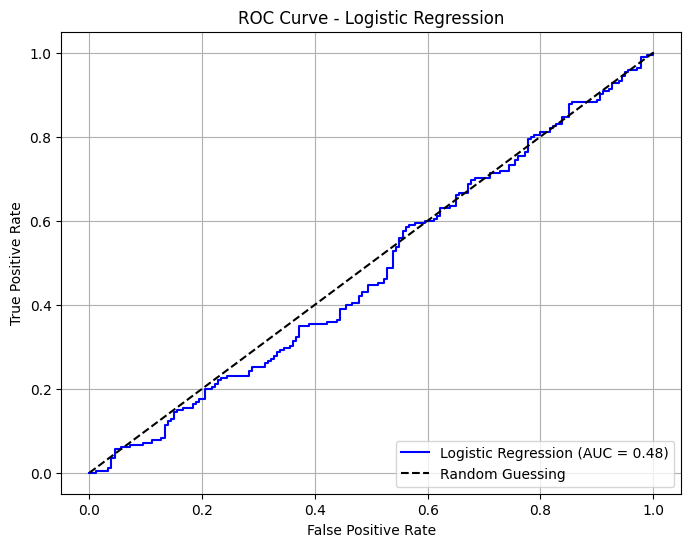

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Línea diagonal (azar)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## **LINEAR DISCRIMINANT ANALYSIS (LDA)**

In [ ]:
# Fit LDA
lda = LDA()
lda.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lda = lda.predict(X_test)
print("Confusion Matrix (LDA):")
print(confusion_matrix(y_test, y_pred_lda))
print("Accuracy:", accuracy_score(y_test, y_pred_lda))


Confusion Matrix (LDA):
[[ 39 152]
 [ 34 150]]
Accuracy: 0.504


LDA assume distribucion Gaussian para los predictores dentro de cada clase y usa los predictores para crear un limite("linea") de decision linear.

In [ ]:
# Tasa de error
error_lda = 1 - accuracy_score(y_test, y_pred_lda)
print("Test Error Rate (LDA):", error_lda)

Test Error Rate (LDA): 0.496


In [ ]:
#ROC Y AUC
# Calcular las probabilidades predichas para la clase positiva
y_pred_prob_lda = lda.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_pred_prob_lda)
# Calcular el AUC
auc_lda = roc_auc_score(y_test, y_pred_prob_lda)
print(f"AUC (LDA): {auc_lda:.2f}")


AUC (LDA): 0.51


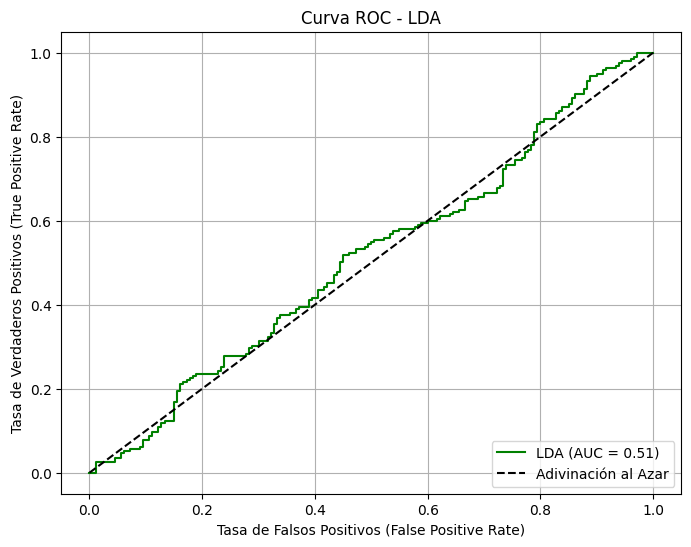

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Curva ROC - LDA")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## **Quadratic Discriminant Analysis (QDA)**

In [ ]:
# Fit QDA
qda = QDA()
qda.fit(X_train, y_train)

# Predictions and evaluation
y_pred_qda = qda.predict(X_test)
print("Confusion Matrix (QDA):")
print(confusion_matrix(y_test, y_pred_qda))
print("Accuracy:", accuracy_score(y_test, y_pred_qda))


Confusion Matrix (QDA):
[[ 51 140]
 [ 55 129]]
Accuracy: 0.48


 QDA es similar a LDA pero permite separar las matrices de covarianza para cada clase, permitiendo limites de decision no lineares(convexos).

In [ ]:
# Tasa de error
error_qda = 1 - accuracy_score(y_test, y_pred_qda)
print("Test Error Rate (QDA):", error_qda)

Test Error Rate (QDA): 0.52


In [ ]:
#ROC Y AUC
# Calcular las probabilidades predichas para la clase positiva
y_pred_prob_qda = qda.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, y_pred_prob_qda)

# Calcular el AUC
auc_qda = roc_auc_score(y_test, y_pred_prob_qda)
print(f"AUC (QDA): {auc_qda:.2f}")



AUC (QDA): 0.51


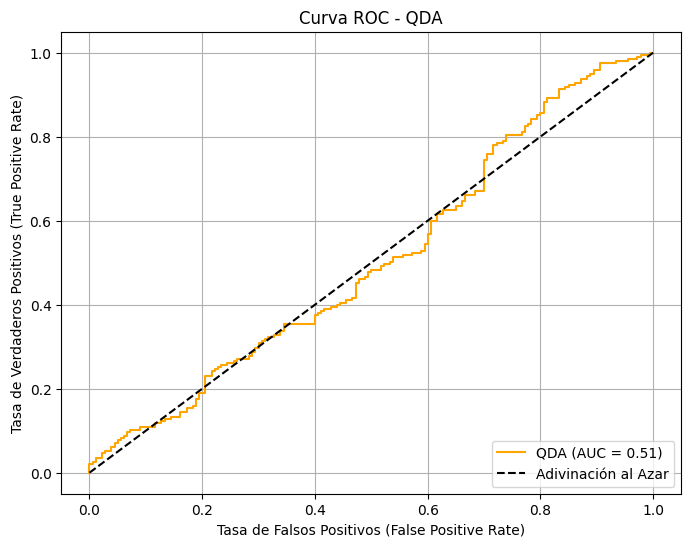

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {auc_qda:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Curva ROC - QDA")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## **K-Nearest Neighbors (KNN)**

 KNN predice la clase en base a un voto mayoritario dentro de los vecinos mas cercanos, es un metodo no parametrico.

Notas adicionales sobre KNN: KNN es sensible a la escala de sus predictores. Se puede estandarizar train y test utilizando StandardScaler.

Hyperparameter Tuning: para KNN se puede ir probando distintos valores de K hasta hallar el optimo.

In [ ]:
# Standardize features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define the parameter grid for k
param_grid = {'n_neighbors': range(1, 21)}  # Test values of k from 1 to 20

# Initialize the KNN model
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best k
best_k = grid_search.best_params_['n_neighbors']
print(f"The best value of k is: {best_k}")


The best value of k is: 17


In [ ]:
# Fit KNN using the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


Confusion Matrix (KNN):
[[ 69 111]
 [ 87 108]]
Accuracy: 0.472


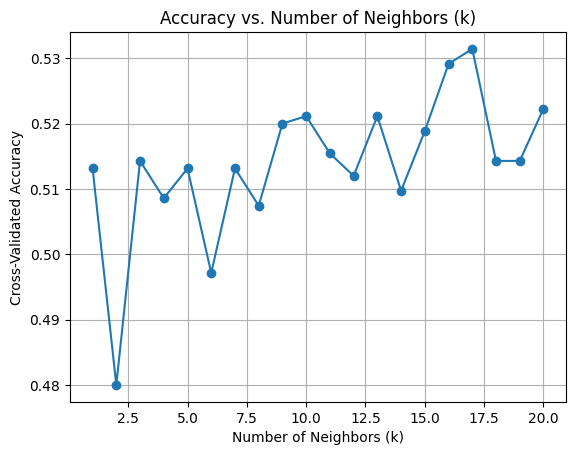

In [ ]:
# Extract accuracy for each value of k
k_values = param_grid['n_neighbors']
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid()
plt.show()


In [ ]:
# Tasa de error
error_knn = 1 - accuracy_score(y_test, y_pred_knn)
print("Test Error Rate (KNN):", error_knn)

Test Error Rate (KNN): 0.528


In [ ]:
#ROC y AUC

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob_knn = best_knn.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

# Calcular el AUC
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
print(f"AUC (KNN): {auc_knn:.2f}")


AUC (KNN): 0.48


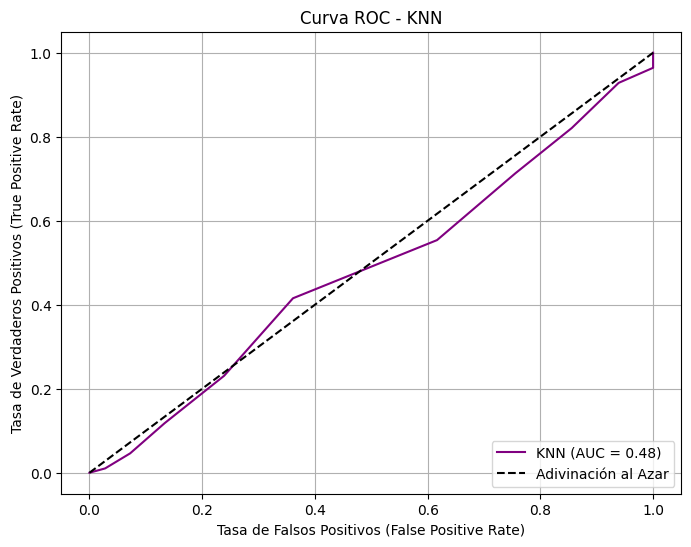

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Curva ROC - KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## **NAIVE BAYES**
El clasificador Naive Bayes asume que las features son independientes dada su clase. Calcula la probabilidad de cada clase y asigna la observacion a la clase con la probabilidad mas alta. Se usa GaussianNB paquete

In [ ]:
# Instantiate the Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test)

# Evaluate the model
print("Confusion Matrix (Naive Bayes):")
print(confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Confusion Matrix (Naive Bayes):
[[ 73 107]
 [ 75 120]]
Accuracy: 0.5146666666666667


In [ ]:
# Tasa de error
error_nb = 1 - accuracy_score(y_test, y_pred_nb)
print("Test Error Rate (Naive Bayes):", error_nb)

Test Error Rate (Naive Bayes): 0.528


In [ ]:
#ROC Y AUC

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)

# Calcular el AUC
auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
print(f"AUC (Naive Bayes): {auc_nb:.2f}")



AUC (Naive Bayes): 0.49


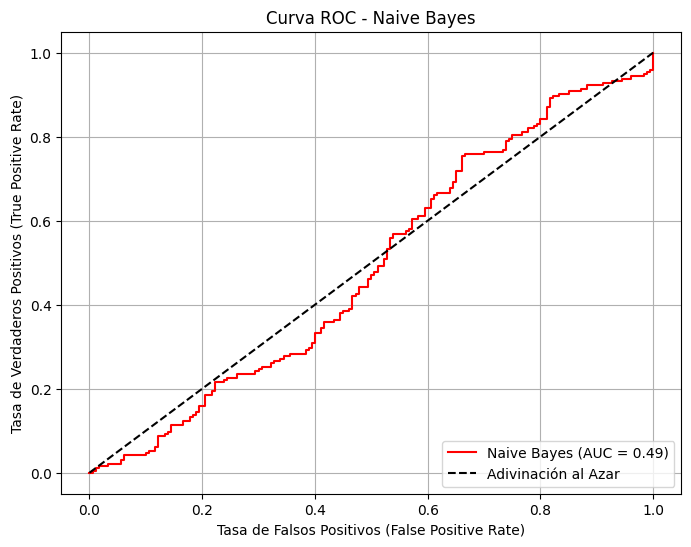

In [ ]:
import matplotlib.pyplot as plt

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Curva ROC - Naive Bayes")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Categorical Features in Naive Bayes:
For datasets with categorical features, you would use CategoricalNB instead of GaussianNB.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
# Simulated categorical dataset
data = {
    'Feature1': np.random.choice(['A', 'B', 'C'], size=200),
    'Feature2': np.random.choice(['X', 'Y'], size=200),
    'Feature3': np.random.choice(['Low', 'Medium', 'High'], size=200),
    'Target': np.random.choice(['Yes', 'No'], size=200)
}

df = pd.DataFrame(data)
print(df.head())


  Feature1 Feature2 Feature3 Target
0        B        Y     High    Yes
1        A        Y   Medium    Yes
2        B        X   Medium    Yes
3        B        Y     High    Yes
4        A        X     High    Yes


In [ ]:
# Encode categorical features
df_encoded = df.copy()
for col in df.columns:
    df_encoded[col] = df[col].astype('category').cat.codes

print(df_encoded.head())


   Feature1  Feature2  Feature3  Target
0         1         1         0       1
1         0         1         2       1
2         1         0         2       1
3         1         1         0       1
4         0         0         0       1


In [ ]:
# Define features and target
X_categorical_NB = df_encoded[['Feature1', 'Feature2', 'Feature3']]
y_categorical_NB = df_encoded['Target']

# Split the dataset
X_train_categorical_NB, X_test_categorical_NB, y_train_categorical_NB, y_test_categorical_NB = train_test_split(X_categorical_NB, y_categorical_NB, test_size=0.3, random_state=42)


In [ ]:
# Initialize the Categorical Naive Bayes model
nb = CategoricalNB()

# Fit the model
nb.fit(X_train_categorical_NB, y_train_categorical_NB)

# Make predictions
y_pred_categorical_NB = nb.predict(X_test_categorical_NB)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test_categorical_NB, y_pred_categorical_NB))
print("Accuracy:", accuracy_score(y_test_categorical_NB, y_pred_categorical_NB))


Confusion Matrix:
[[11 22]
 [ 6 21]]
Accuracy: 0.5333333333333333


## **PLOT DE LAS TASAS DE ERRORES EN LOS DISTINTOS METODOS**

In [ ]:
# Diccionario con los resultados
error_rates = {
    "Naive Bayes": 0.528,
    "KNN": 0.472,
    "QDA": 0.52,
    "LDA": 0.496,
    "Logistic Regression": 0.4933333333333333
}


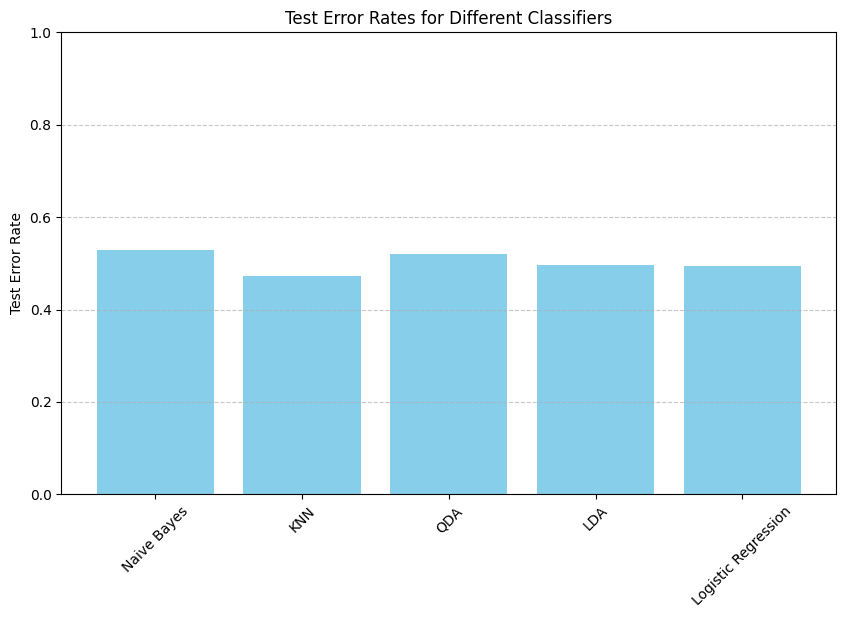

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(error_rates.keys(), error_rates.values(), color='skyblue')
plt.ylabel("Test Error Rate")
plt.title("Test Error Rates for Different Classifiers")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # El rango de las tasas de error (0 a 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


## GRAFICO COMBINADO DE CURVAS ROC

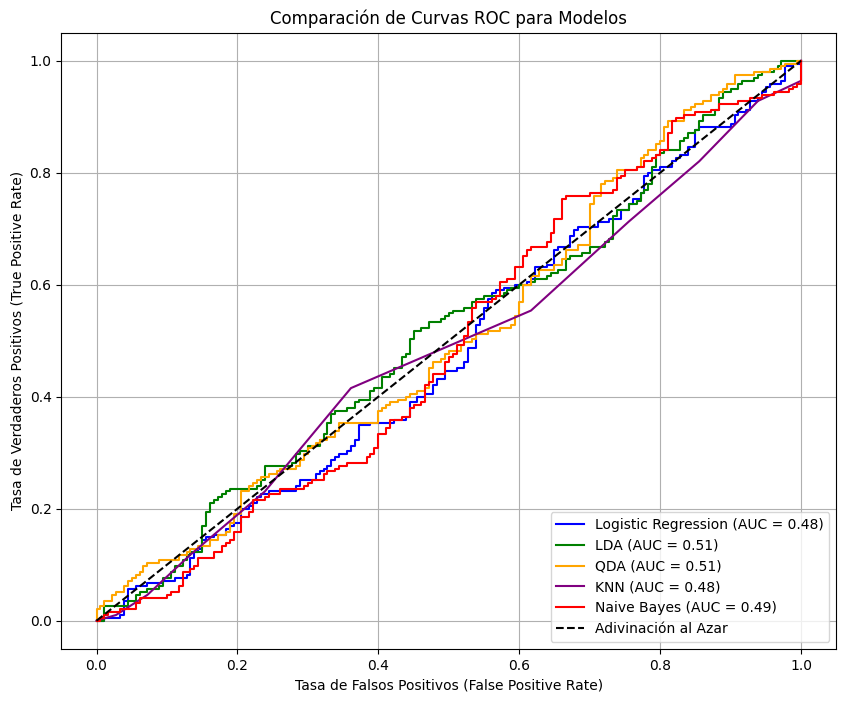

In [ ]:
# Graficar todas las curvas ROC
plt.figure(figsize=(10, 8))

# Agregar cada curva ROC
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color='blue')
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.2f})", color='green')
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {auc_qda:.2f})", color='orange')
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})", color='purple')
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})", color='red')

# Línea diagonal (azar)
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")

# Personalizar el gráfico
plt.xlabel("Tasa de Falsos Positivos (False Positive Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (True Positive Rate)")
plt.title("Comparación de Curvas ROC para Modelos")
plt.legend(loc="lower right")
plt.grid()
plt.show()


La Curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que evalúa el rendimiento de un modelo de clasificación binaria en diferentes umbrales de decisión.

Ejes del gráfico:

Eje X: Tasa de falsos positivos (False Positive Rate, FPR).
𝐹
𝑃
𝑅
=
Falsos Positivos (FP)
Total de Negativos (FP + TN)
FPR=
Total de Negativos (FP + TN)
Falsos Positivos (FP)
​

Eje Y: Tasa de verdaderos positivos (True Positive Rate, TPR o Sensibilidad).
𝑇
𝑃
𝑅
=
Verdaderos Positivos (TP)
Total de Positivos (TP + FN)
TPR=
Total de Positivos (TP + FN)
Verdaderos Positivos (TP)
​

Cómo se construye:

El modelo calcula una probabilidad de pertenecer a la clase positiva para cada observación.
Se varía el umbral de decisión (ej. de 0 a 1) y se calculan los FPR y TPR correspondientes en cada punto.
Se grafica la TPR frente a la FPR.

¿Qué mide el AUC (Area Under the Curve)?
El AUC es el área bajo la curva ROC y es un resumen numérico del rendimiento global del modelo.

Interpretación:

AUC = 1: Modelo perfecto.
AUC = 0.5: Modelo no mejor que el azar.

0.5 < AUC < 1: Indica qué tan bien el modelo separa las clases:

Más cerca de 1: Mejor discriminación.

Más cerca de 0.5: Peor discriminación.

¿Para qué sirven ROC y AUC?
Evaluar el rendimiento de un modelo de clasificación:
Comparan la capacidad de un modelo para separar correctamente las clases positivas y negativas.
Ayudan a seleccionar umbrales:
La curva ROC muestra cómo varían las métricas de falsos positivos y verdaderos positivos en función del umbral de decisión.
Comparar modelos:
AUC permite comparar diferentes modelos de manera objetiva:
Modelos con mayor AUC tienen mejor capacidad de discriminación.
¿Cuándo se usan?
Clasificación binaria:
Para evaluar modelos como Regresión Logística, LDA, KNN, Naive Bayes, etc.
Clases desbalanceadas:
Son útiles porque no dependen de un único umbral o de la proporción de clases.
Ventajas de ROC y AUC
Independientes del umbral:
Evalúan el modelo en todos los umbrales posibles, proporcionando una visión completa.
Comparación fácil:
AUC permite comparar múltiples modelos con un solo número.
Limitaciones
No mide precisión:
No considera qué tan cerca están las probabilidades predichas de los valores reales.
No apto para clasificación multiclase:
ROC y AUC requieren adaptaciones para problemas con más de dos clases.